In [1]:
import sys

import numpy as np
from matplotlib import pyplot as plt
import torch

sys.path.append("..")
from dataset import gabor_stimuli
from utils import data_utils

import importlib
importlib.reload(gabor_stimuli);
importlib.reload(data_utils);

In [2]:
def plot_seqs(dataset, test=False):
    returns = dataset[0]
    labels = None
    color_idx = 0
    if dataset.return_label:
        seq, labels = returns
    else:
        seq = returns
    if test:
        print("Showing first 2 sub-batches")
        seq = seq[:2].reshape(-1, *seq.shape[2:])
        labels = labels[:2].reshape(-1, *labels.shape[2:])

    num_seq, _, seq_len, _, _  = seq.shape # N x C x SL x H x W
    vmin = seq.min()
    vmax = seq.max()
    for s in range(num_seq):
        fig, ax = plt.subplots(1, seq_len, figsize=(seq_len * 3, 3))
        for i, sub_ax in enumerate(ax.ravel()):
            sub_ax.axis("off")
            sub_ax.imshow(seq[s, color_idx, i], cmap="Greys", vmin=vmin, vmax=vmax);
            if labels is not None:
                image_type = dataset.image_label_to_image([labels[s, i, 0].item()])[0]
                image_ori = labels[s, i, 1].item()
                if np.isfinite(image_ori):
                    label = f"{image_type} ({int(image_ori)} deg)"
                else:
                    label = image_type
                sub_ax.set_title(label, fontsize="xx-large")

## No roll, diff U positions/sizes (50% prob)

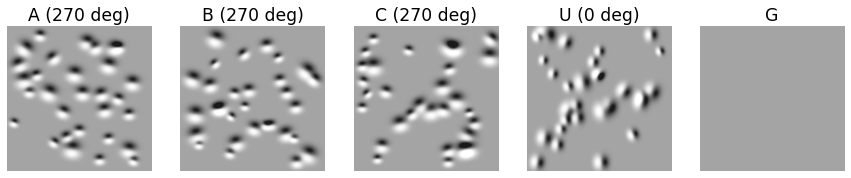

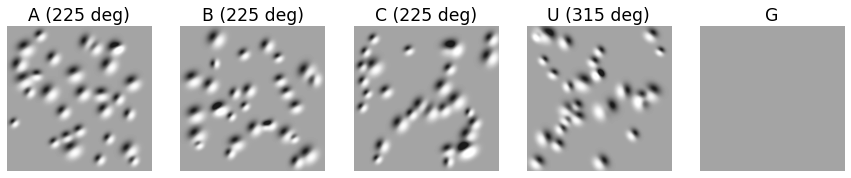

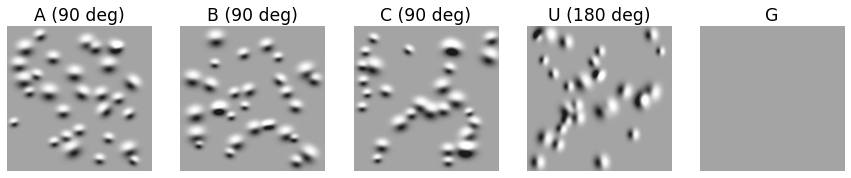

In [3]:
dataset = gabor_stimuli.GaborSequenceGenerator(
    seq_len=5, 
    num_seq=3,
    roll=False, 
    shift_frames=False,
    diff_U_possizes=True, 
    U_prob=0.5, 
    return_label=True
)
plot_seqs(dataset);

## Roll, same U positions/sizes (50% prob)

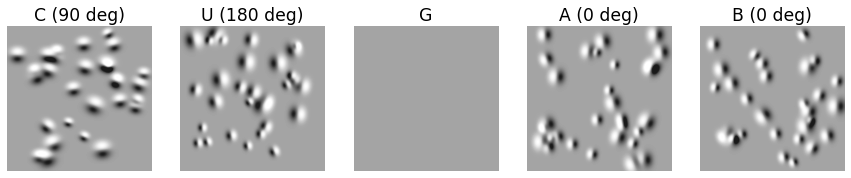

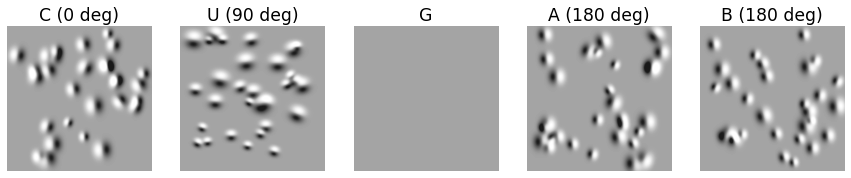

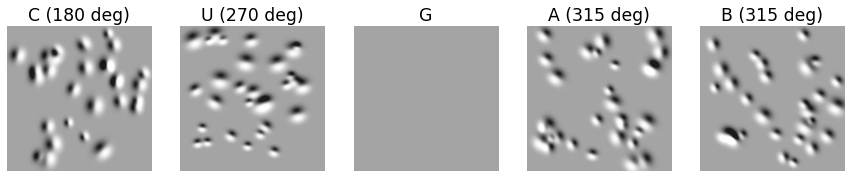

In [4]:
dataset = gabor_stimuli.GaborSequenceGenerator(
    seq_len=5, 
    num_seq=3,
    roll=True, 
    shift_frames=False,
    diff_U_possizes=False, 
    U_prob=0.5, 
    return_label=True
)
plot_seqs(dataset)

## Roll, 2 frames per image, no gray, no U (0% prob)

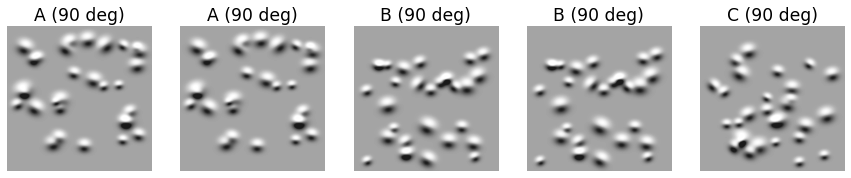

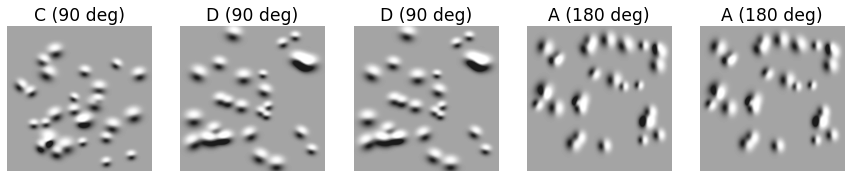

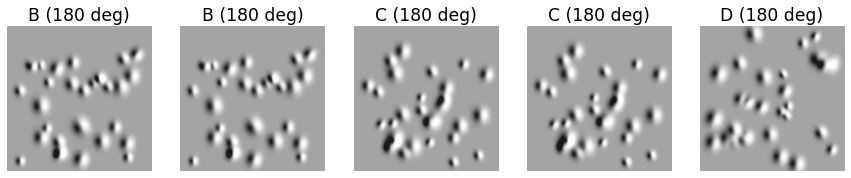

In [5]:
dataset = gabor_stimuli.GaborSequenceGenerator(
    seq_len=5, 
    num_seq=3,
    roll=True, 
    shift_frames=False,
    gray=False, 
    gab_img_len=2, 
    U_prob=0, 
    return_label=True
)
plot_seqs(dataset)

## Roll, 2 frames per image, allow frame shift, no gray, no U (0% prob)

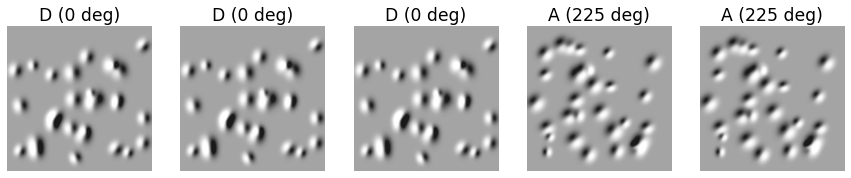

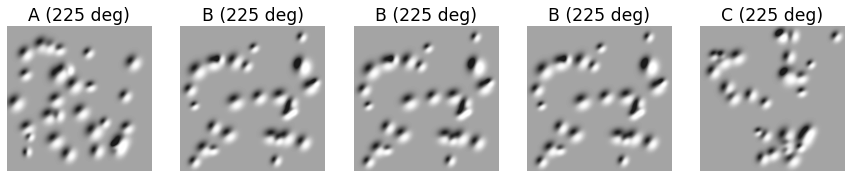

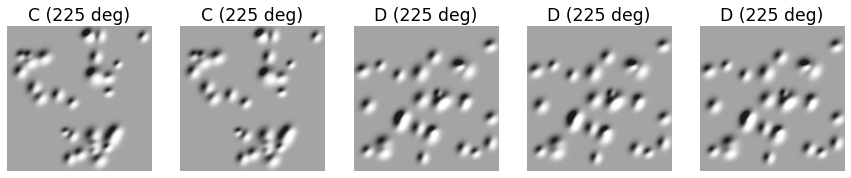

In [6]:
dataset = gabor_stimuli.GaborSequenceGenerator(
    seq_len=5, 
    num_seq=3,
    roll=True,
    shift_frames=True,
    gray=False, 
    gab_img_len=3, 
    U_prob=0, 
    return_label=True
)
plot_seqs(dataset)

## No roll, diff possizes, diff U positions/sizes (50% prob)

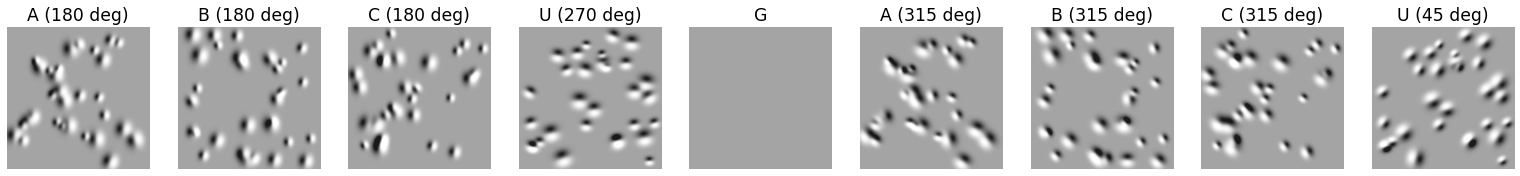

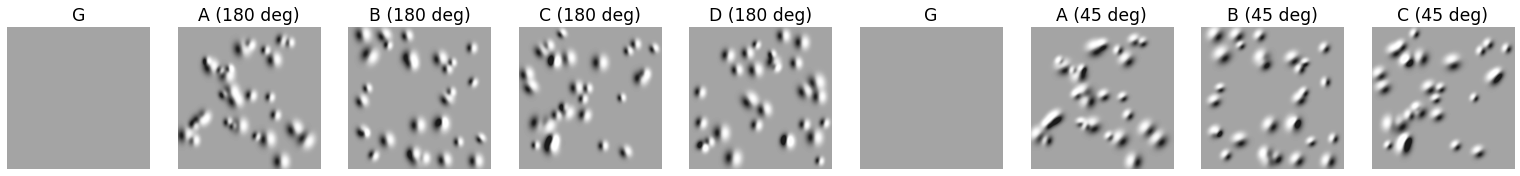

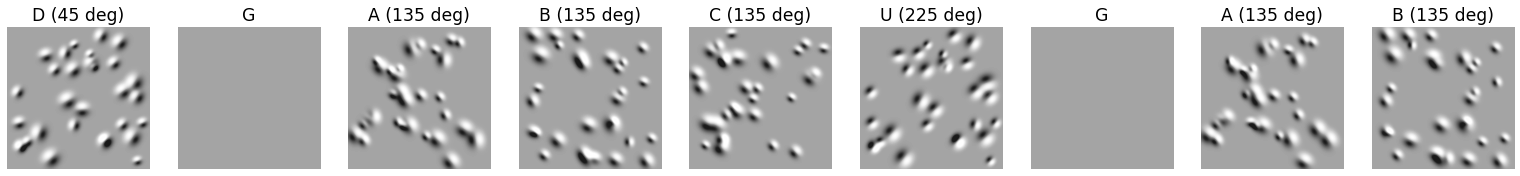

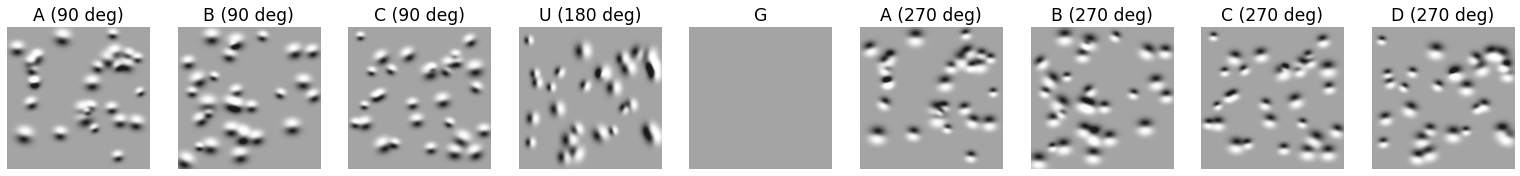

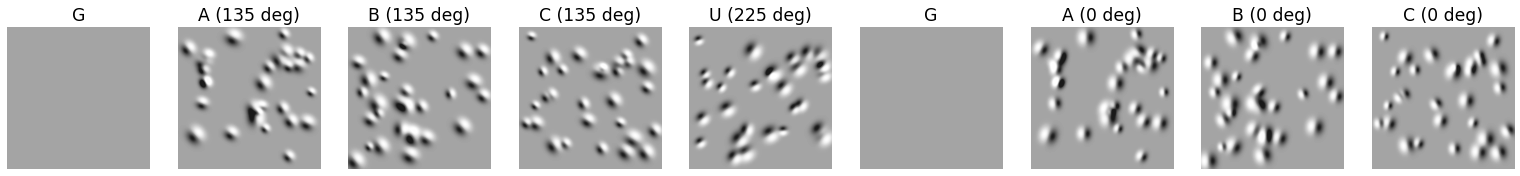

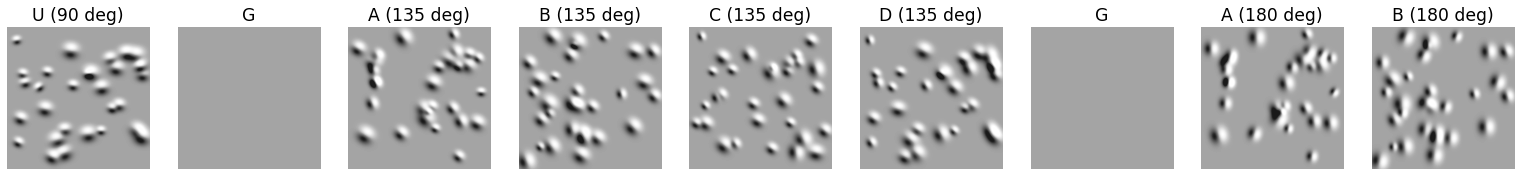

In [7]:
dataset = gabor_stimuli.GaborSequenceGenerator(
    seq_len=9, 
    num_seq=3,
    same_possizes=False, 
    roll=False, 
    shift_frames=False,
    gray=True, 
    U_prob=0.5, 
    return_label=True
)
plot_seqs(dataset)
plot_seqs(dataset)

## No roll, same U positions/sizes (50% prob), seed 15

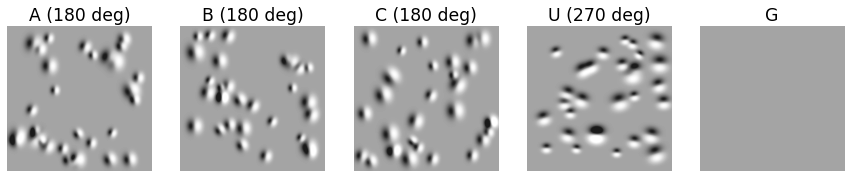

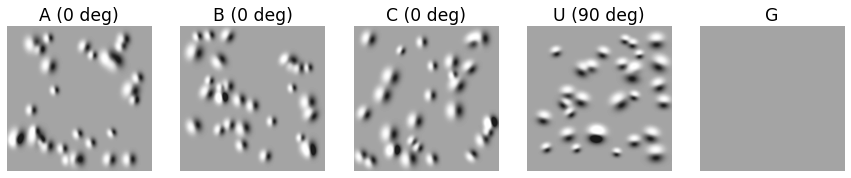

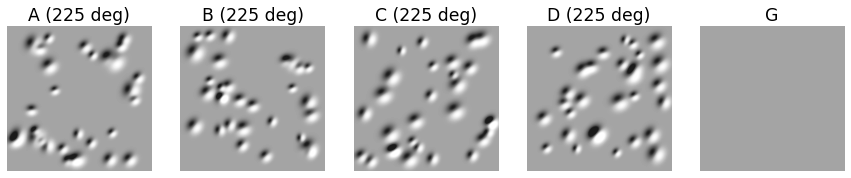

In [8]:
dataset = gabor_stimuli.GaborSequenceGenerator(
    seq_len=5, 
    num_seq=3,
    same_possizes=True,
    roll=False, 
    shift_frames=False,
    gray=True, 
    U_prob=0.5, 
    return_label=True,
    seed=15
)
plot_seqs(dataset)

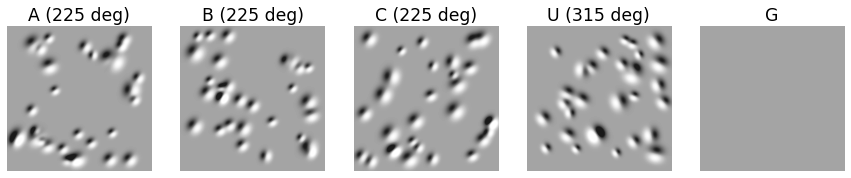

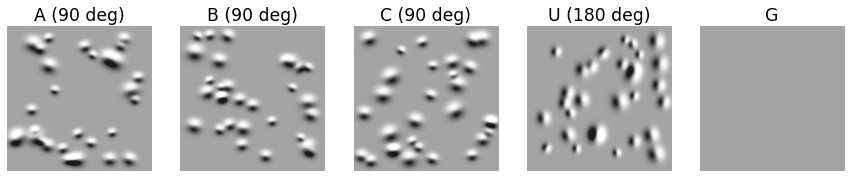

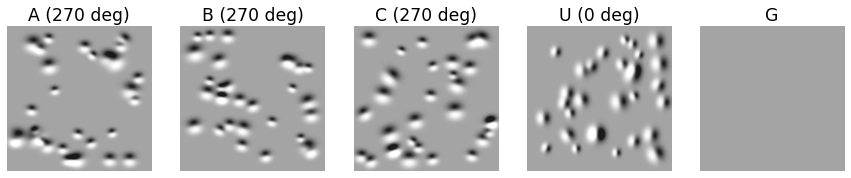

In [9]:
dataset = gabor_stimuli.GaborSequenceGenerator(
    seq_len=5, 
    num_seq=3,
    same_possizes=True,
    roll=False, 
    shift_frames=False,
    gray=True, 
    U_prob=0.5, 
    return_label=True,
    seed=15
)
plot_seqs(dataset)

## No roll, same U positions/sizes (50% prob), gamma=1/2

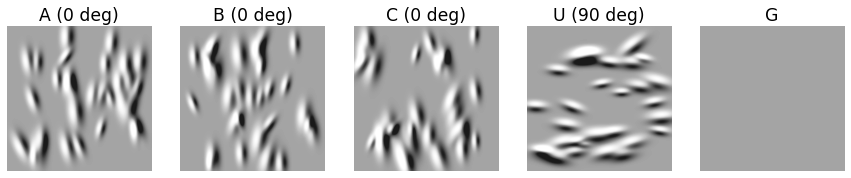

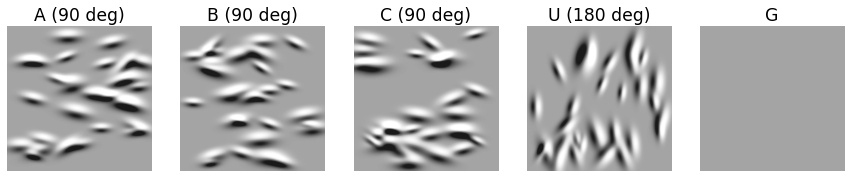

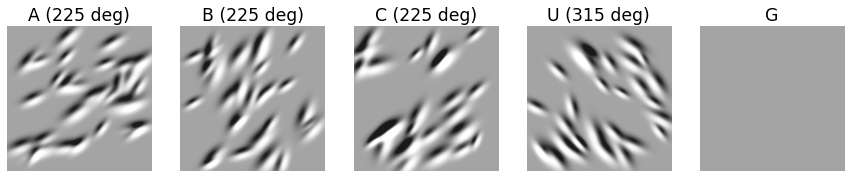

In [10]:
dataset = gabor_stimuli.GaborSequenceGenerator(
    seq_len=5, 
    num_seq=3,
    gamma=1/2,
    roll=False, 
    shift_frames=False,
    gray=True, 
    U_prob=0.5, 
    return_label=True,
)
plot_seqs(dataset)

## Apply transform
### Training transform

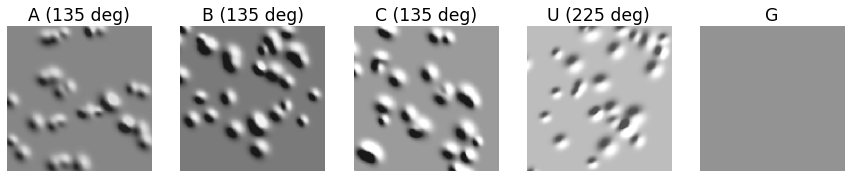

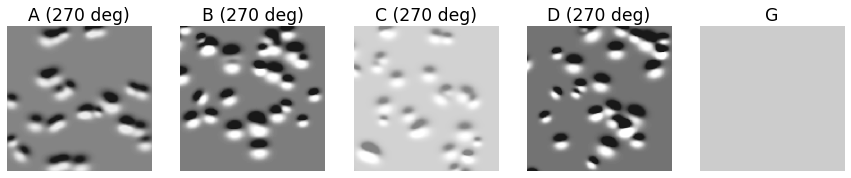

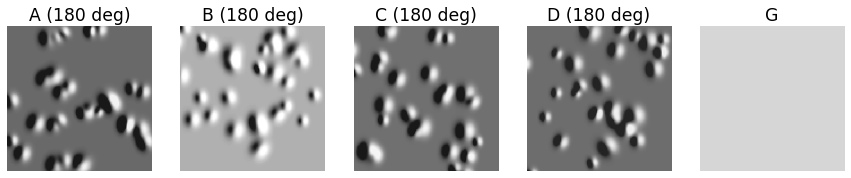

In [11]:
transform = data_utils.get_transform("Gabors", 128, mode="train")

dataset = gabor_stimuli.GaborSequenceGenerator(
    transform=transform,
    seq_len=5, 
    num_seq=3,
    roll=False, 
    shift_frames=False,
    gray=True, 
    U_prob=0.5, 
    return_label=True,
)
plot_seqs(dataset)

### Test transform

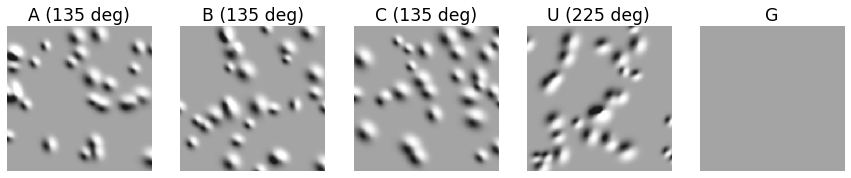

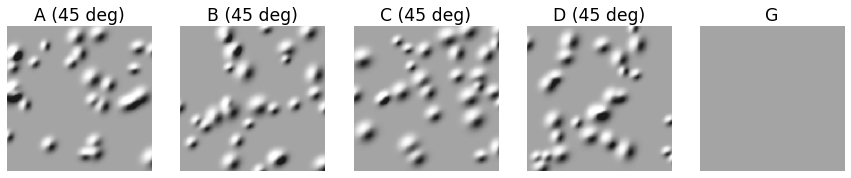

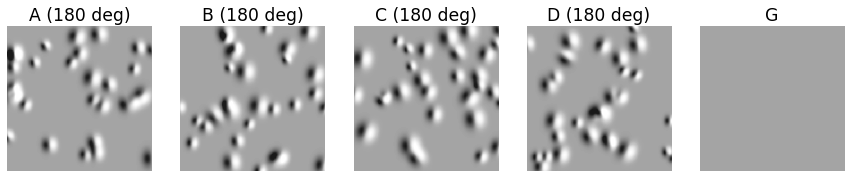

In [12]:
transform = data_utils.get_transform(None, 128, mode="test", allow_flip=False)

dataset = gabor_stimuli.GaborSequenceGenerator(
    transform=transform,
    seq_len=5, 
    num_seq=3,
    roll=False, 
    shift_frames=False,
    gray=True, 
    U_prob=0.5, 
    return_label=True,
)
plot_seqs(dataset)

# Test mode

Showing first 2 sub-batches


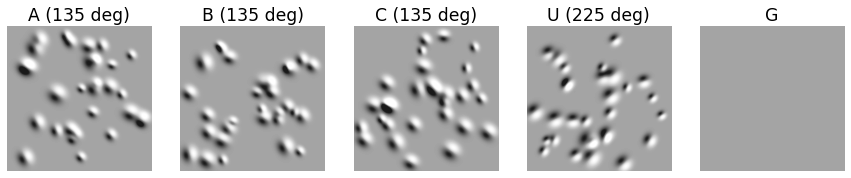

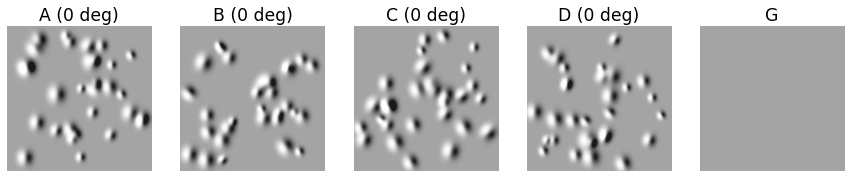

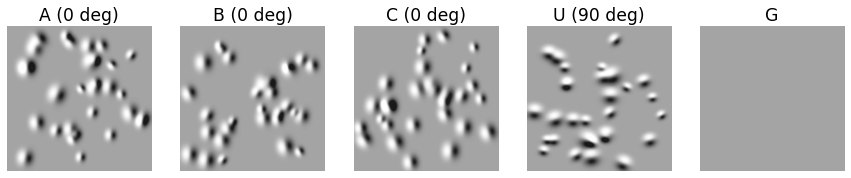

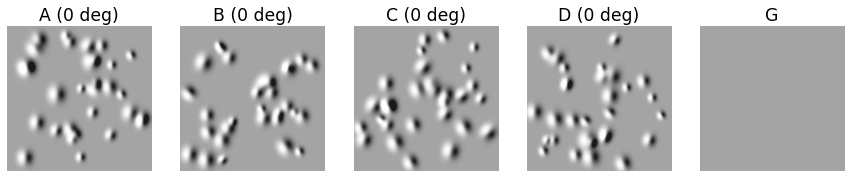

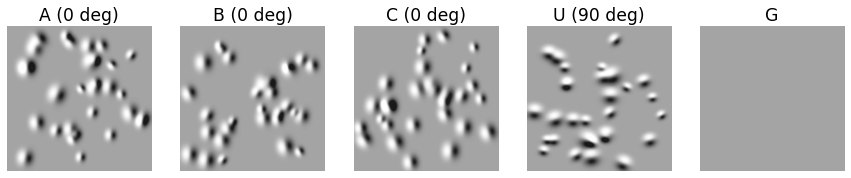

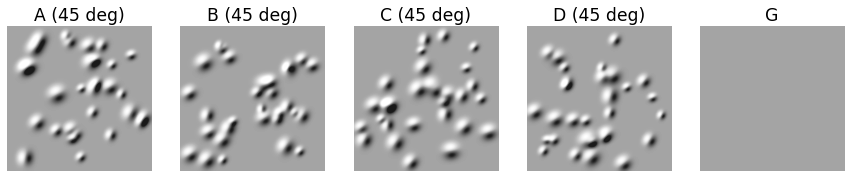

In [13]:
dataset = gabor_stimuli.GaborSequenceGenerator(
    mode="test",
    supervised=True,
    seq_len=5, 
    num_seq=3,
    roll=False,
    shift_frames=False,
    gray=True, 
    U_prob=0.5, 
    return_label=True,
)
plot_seqs(dataset, test=True)

# Current parameters

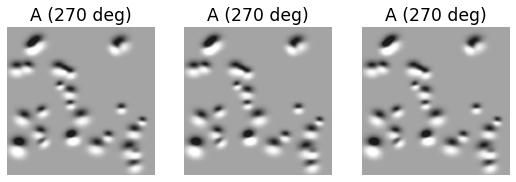

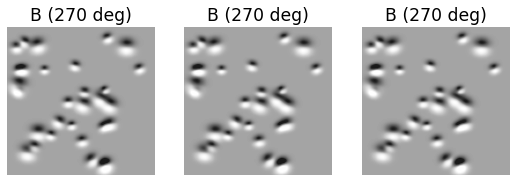

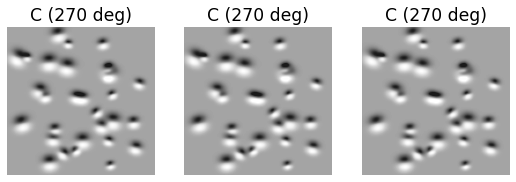

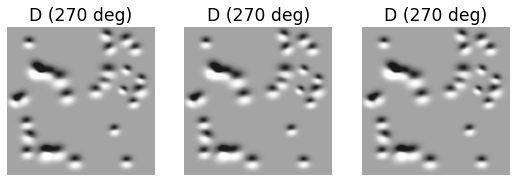

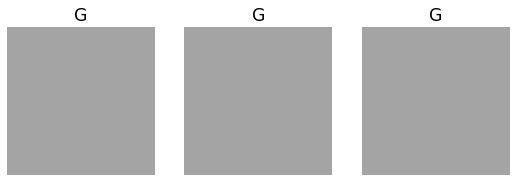

In [14]:
transform = data_utils.get_transform("Gabors", 128, mode="train", no_augm=True)
dataset = gabor_stimuli.GaborSequenceGenerator(
    transform=transform,
    gab_img_len=3, 
    seq_len=3, 
    num_seq=5,
    roll=True, 
    shift_frames=False,
    gray=True, 
    U_prob=0.1, 
    return_label=True,
)
plot_seqs(dataset)

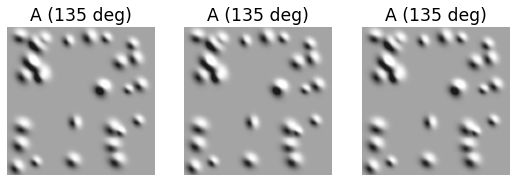

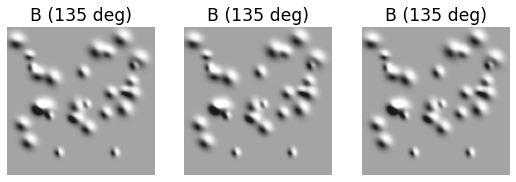

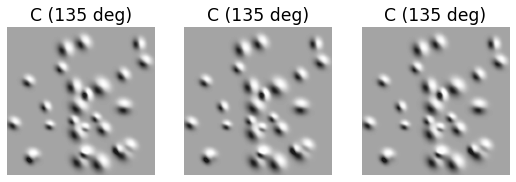

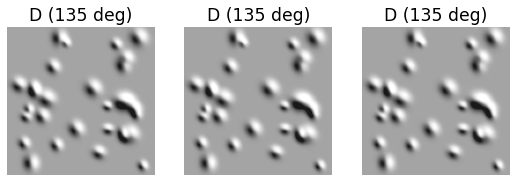

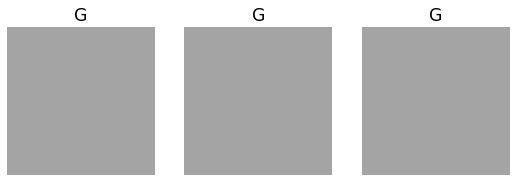

In [15]:
transform = data_utils.get_transform("Gabors", 128, mode="train", no_augm=True)
dataset = gabor_stimuli.GaborSequenceGenerator(
    transform=transform,
    gab_img_len=3, 
    seq_len=3, 
    num_seq=5,
    roll=False, 
    shift_frames=False,
    gray=True, 
    U_prob=0.1, 
    return_label=True,
)
plot_seqs(dataset)